In [15]:
!pip install numpy matplotlib pandas tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
with open("metrics_cuda.json", encoding="utf-8") as f:
    data = json.load(f)

with open("metrics_opencl.json", encoding="utf-8") as f:
    data += json.load(f)

In [18]:
df = pd.DataFrame(data)
df.sort_values("duration", ascending=False)

,size,duration,value,block_size,grid_size,runtime,device
191,100000000,1.091260,0.333295,16,512.0,OpenCL,Intel(R) Arc(TM) Graphics
79,100000000,1.051054,0.333285,16,32.0,OpenCL,Intel(R) Arc(TM) Graphics
76,100000000,0.952599,0.333295,1024,16.0,clBLASt,Intel(R) Arc(TM) Graphics
80,100000000,0.876365,0.333295,16,32.0,clBLASt,Intel(R) Arc(TM) Graphics
192,100000000,0.649276,0.333295,16,512.0,clBLASt,Intel(R) Arc(TM) Graphics
...,...,...,...,...,...,...,...
102,100000000,0.033046,0.332568,1024,32.0,OpenBLAS,CPU
174,100000000,0.033002,0.332568,128,256.0,OpenBLAS,CPU
214,100000000,0.032878,0.332568,1024,512.0,OpenBLAS,CPU
234,100000000,0.032214,0.332568,256,1024.0,OpenBLAS,CPU


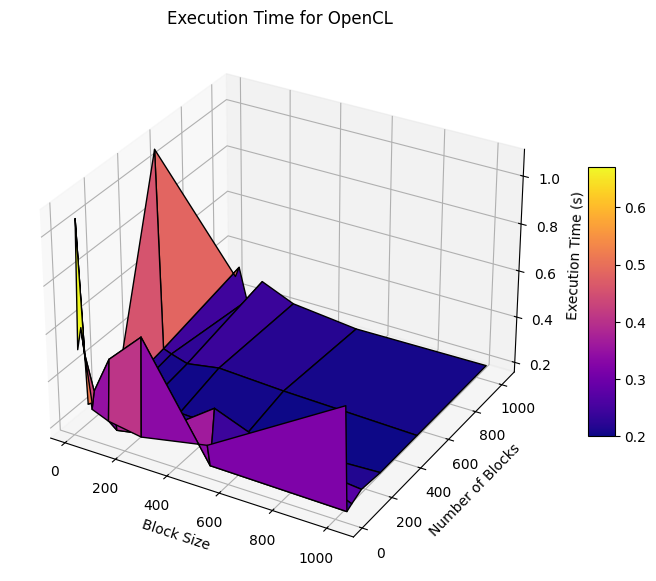

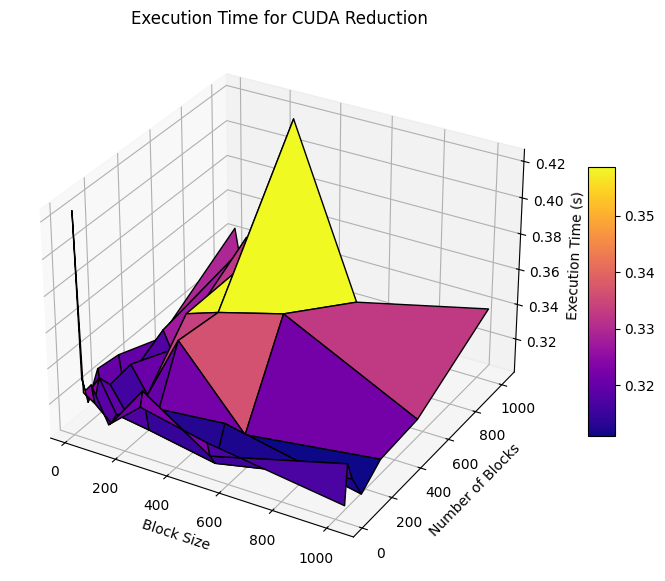

In [19]:
runtimes = df["runtime"].unique()

for target_runtime in ['OpenCL', 'CUDA Reduction']:
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['grid_size'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['grid_size'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')

    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
